Plotting Striatum ROI:
two transverse slices for each contrast:
1) (Negative active>passive) > (Positive active>passive)
2) (Neg active>passive)
Z = 38 for Caudate and Z = 34 for Nacc/Putamen

In [5]:
import os
import numpy as np
import nibabel as nib
import pandas as pd
from scipy import ndimage
import matplotlib.pyplot as plt
#import nilearn
from nilearn import plotting
from nilearn import image
from nilearn.datasets import fetch_atlas_harvard_oxford
from nilearn.datasets import fetch_haxby
from nilearn.regions import connected_label_regions

In [ ]:
### Setting display. Do not rerun this cell --> slow processing. Close display after.
base_dir = "../../results/randomise"
plot_1 = base_dir+'/desc_negpos/Striatum_bin/Striatum_bin_tfce_corrp_tstat1.nii.gz'
plot_2 = base_dir+'/desc_neg/Striatum_bin/Striatum_bin_tfce_corrp_tstat1.nii.gz'
data_1 = nib.load(plot_1).get_data()
print(np.shape(data_1))

display = plotting.plot_stat_map(stat_map_img = plot_1, display_mode ='z', threshold=.975,
                                 cut_coords=[4, -4], cmap = 'red_transparent', colorbar = False,
#output_file = 'striatumroi.jpg',
                         )

In [35]:

###to ease interpretation we added the contours of the nucleus accumbens, caudate and putamen.
###Note that this is strictly done and that we used a probabilistic ROI for the entire striatum in our analyses.


#Fetch Harvard-Oxford atlasses and set the needed labels:
subc_rois = fetch_atlas_harvard_oxford('sub-maxprob-thr0-2mm', symmetric_split=True)
atlas_map = subc_rois['maps'].get_data()
labels = subc_rois['labels']
ROIs = ["Left Caudate", "Left Putamen", "Left Accumbens", "Right Caudate", "Right Putamen", "Right Accumbens"]
picked_labels_idx = []
for roi in ROIs:
    #To do: Make the mask nibabel compatable. add.contours asks for an image so a filename, not an 3d np-array.. 
    #shape of these masks should not be the issue (91,109,91) same as the tstat file.
    mask = atlas_map == labels.index(roi)
    picked_labels_idx.append(labels.index(roi))
    display.add_contours(mask, colors=['black'])
print(to_use_labels)
plotting.show()

(91, 109, 91)
[5, 6, 12, 17, 18, 22]


/home/c11399708/nilearn_data/haxby2001/subj2/mask4_vt.nii.gz
(40, 64, 64)


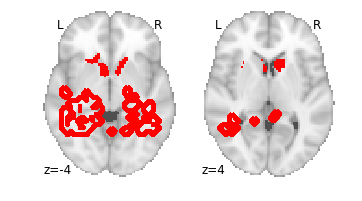

TypeError: Data given cannot be loaded because it is not compatible with nibabel format:
0.0

In [37]:
#Trying it with another map, as provided online on: https://nilearn.github.io/auto_examples/01_plotting/plot_haxby_masks.html#sphx-glr-auto-examples-01-plotting-plot-haxby-masks-py
haxby_dataset = fetch_haxby()
mask_vt_filename = haxby_dataset.mask_vt[0]
print(mask_vt_filename)
mask_vt = nib.load(mask_vt_filename).get_data()
print(np.shape(mask_vt))

#Reset the display-image.
display = plotting.plot_stat_map(stat_map_img = plot_1, display_mode ='z', threshold=.975,
                                 cut_coords=[4, -4], cmap = 'red_transparent', colorbar = False,
#output_file = 'striatumroi.jpg',
                         )
#This is simply a path that relates to a 3d map of a structural image. Only as a filename, the contours are added.
display.add_contours(mask_vt_filename, contours=1, antialiased=False,linewidths=4., levels=[0], colors=['red'])
plotting.show()
#Using the np-array doesnt work:
display.add_contours(mask_vt, contours=1, antialiased=False,linewidths=4., levels=[0], colors=['red'])
plotting.show()

In [ ]:
display.close()

Plotting Whole brain one plot with three colours

X = 20 (saggital slice dACC), X = 46 (saggital slice IFG), Y = 69, Z = 36 for transverse and coronal slices)
a.	Neg active > passive 
File: FEAT, Cope1, thresh_zstat_1.nii.gz
b.	Pos active > passive 
File: FEAT, Cope2, thresh_zstat_1.nii.gz
c.	Conjunction: neg active > passive  && pos active > passive

(91, 109, 91)


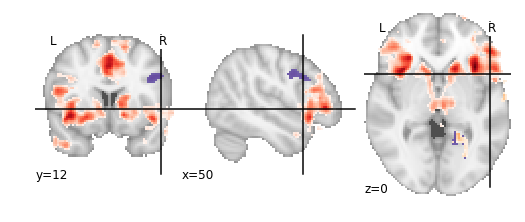

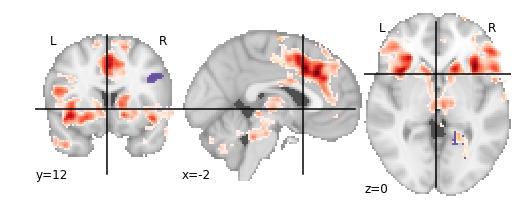

In [70]:
### Plotting the whole-brain analysis, with the conjunction. Be aware that this file should change!
base_dir = "../../results/wholebrain.gfeat"
wb_plot_neg = base_dir+"/cope1.feat/thresh_zstat1.nii.gz"
wb_plot_pos = base_dir+"/cope2.feat/thresh_zstat1.nii.gz"
wb_plot_conj_negpos = base_dir+'/conj_analysis/thresh_conjunction_cue-negpos_contrast-actpas.nii.gz'
x_cos = [50, -2]
y_co = 12
z_co = 0
for x_co in x_cos:
    display = plotting.plot_stat_map(stat_map_img = wb_plot_neg, display_mode = 'ortho', cut_coords = [x_co, y_co, z_co], threshold = 2.58, 
                                 cmap = plt.cm.Purples, colorbar = False, 
                                     #output_file = wholebrain-plot
                                    )
    display.add_overlay(wb_plot_pos, threshold = 2.58, cmap = plt.cm.Oranges)
    display.add_overlay(wb_plot_conj_negpos, threshold = 2.58, cmap = plt.cm.Reds)
    plotting.show()
    display.close()

